# DiploDatos 2019 -  Población Penitenciaria en Argentina


> http://diplodatos.famaf.unc.edu.ar/poblacion-penitenciaria-en-argentina-2002-a-2017/



# Análisis por género

En esta notebook nos proponemos hacer un análisis más fino de las diferencias de género en la población penitenciaria argentina. 

In [ ]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
# Importamos las librerías necesarias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 100)

#
#sys.path.append('../config')
#from mpl_settings_v3 import *

In [ ]:
## Cargamos el CSV en un dataframe. Si es posible, lo descargamos y 
## sino, lo leemos online. (Para descargarlo es necesario tener instalado wget)

data_dir = '../datasets'
data_file = os.path.join(data_dir, 'sneep_2017_diplodatos.csv')

if not os.path.isfile(data_file):
    print('No se encontró copia local del dataset. Leyendo online')
    data_raw = pd.read_csv(url,index_col=0)
else:
    data_raw = pd.read_csv(data_file, index_col=0)

In [ ]:
## Seteamos semilla random para reproducibilidad
np.random.seed(0)

Primero desplegamos los datos para explorarlos un poco

In [ ]:
data_raw.head()
#data_raw.tail()

Vemos cuales son las variables de las cuales disponemos y sus tipos

In [ ]:
data_raw.dtypes

In [ ]:
# Distribución por genero
g = data_raw["genero_descripcion"]
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

In [ ]:
ax = data_raw["genero_descripcion"].value_counts().plot(kind='barh', figsize=(10,6), color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Proporción de internos por género", fontsize=18)
ax.set_xlabel("", fontsize=18);
ax.set_xticks([0, 20000, 40000, 60000, 90000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

Como puede observarse, más del 95% de las personas privadas de su libertad son identificadas con el género masculino, poco más del 4% se identifica como mujer, mientras que solo el 0.15% como transexual. Si bien la diferencia es abismal, quisieramos analizar la situación particular de estas minorías, por ejemplo, si es más común que sean condenados por ciertos delitos que por otros, si se le dan penas distintas que a la población general por los mismos delitos, si reciben más o menos beneficios, más o menos educación, formación o trabajo que la población general, etc.

Para comenzar quisieramos saber cuáles son los tipos de delitos por los cuales las personas están privadas de su libertad. Tenemos en cuenta que estos datos corresponden solo al año 2017, fijamos el año para no contar dos veces al mismo reo, además solo utilizamos el delito principal de cada persona.

In [ ]:
g = data_raw["delito1_descripcion"]
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="delito1_descripcion", data=data_raw, order=data_raw.delito1_descripcion.value_counts().iloc[:10].index)
ax.set_ylabel('') 
ax.set_title("Frecuencia delitos, población general", fontsize=16)

Quisieramos ver cuáles tipos de delitos son más comunes según el género y en las minorías de género.

In [ ]:
m = data_raw.loc[data_raw["genero_descripcion"] == 'Masculino']["delito1_descripcion"]
df = pd.concat([m.value_counts(), 
                m.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="delito1_descripcion", data=data_raw.loc[data_raw["genero_descripcion"] == 'Masculino'], 
                   order=data_raw.delito1_descripcion.value_counts().iloc[:10].index)
ax.set_ylabel('') 
ax.set_title("Frecuencia delitos, población masculina", fontsize=16)

In [ ]:
f = data_raw.loc[data_raw["genero_descripcion"] == 'Femenino']["delito1_descripcion"]
df = pd.concat([f.value_counts(), 
                f.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="delito1_descripcion", data=data_raw.loc[data_raw["genero_descripcion"] == 'Femenino'], 
                   order=data_raw.delito1_descripcion.value_counts().iloc[:10].index)
ax.set_ylabel('') 
ax.set_title("Frecuencia delitos, población femenina", fontsize=16)

In [ ]:
t = data_raw.loc[data_raw["genero_descripcion"] == 'Transexual']["delito1_descripcion"]
df = pd.concat([t.value_counts(), 
                t.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="delito1_descripcion", data=data_raw.loc[data_raw["genero_descripcion"] == 'Transexual'], 
                   order=data_raw.delito1_descripcion.value_counts().iloc[:5].index)
ax.set_ylabel('') 
ax.set_title("Frecuencia delitos, población trans", fontsize=16)

El delito principal entre la población masculina presa es Robo y/o tentativa de robo (más del 35% de los casos). Entre mujeres y trans el principal delito es la Infracción a la ley de estupefacientes; casi el 43% de las mujeres privadas de su libertad es por esta causa, mientras que en el caso de las personas trans este porcentaje asciende a más del 69%. Si se observa la población general, el principal delito es Robo y/o tentativa de robo, esto se debe a que como la población masculina es mucho mayor, sus tendencias absorben a las de las minorías, por eso queríamos hacer este análisis diferenciado. En el caso de la población masculina, el delito de Infracción a la ley de estupefacientes es el tercero más frecuente, siendo el segundo los Homicidios dolosos. 

A continuación queremos comparar las proporciones de los principales delitos (y de los delitos que son de nuestro interés) por género. Puesto que, como habiamos dicho, la población masculina es mucho mayor, pasamos las cantidades a porcentajes para hacerlas comparables.

In [ ]:
x = ['Masculino', 'Femenino', 'Transexual']

mas = m.value_counts()
fem = f.value_counts()
trans = t.value_counts()

# normalization
y1 = mas/sum(mas)*100.
y2 = fem/sum(fem)*100.
y3 = trans/sum(trans)*100.

z1 = np.array([y1[0], y2[1], y3[2]]) #'Robo y/o tentativa de robo'
z2 = np.array([y1[1], y2[2], y3[1]]) #'Homicidios dolosos'
z3 = np.array([y1[2], y2[0], y3[0]]) #'Infracción ley n° 23.737 (estupefacientes)'
z4 = np.array([y1[3], y2[5], y3[3]]) #'Violaciones'
z5 = np.array([y1[8], y2[6], y3[5]]) #'Otros delitos contra la integridad sexual'
z6 = np.array([sum(y1)-y1[0]-y1[1]-y1[2]-y1[3]-y1[8], 
              sum(y2)-y2[0]-y2[1]-y2[2]-y2[5]-y2[6], 
              sum(y3)-y3[0]-y3[1]-y3[2]-y3[3]-y3[5]]) #'OTROS'

plt.figure(figsize=(15,8))

# stack bars
plt.bar(x, z1, label='Robo y/o tentativa de robo')
plt.bar(x, z2, bottom= z1, label='Homicidios dolosos')
plt.bar(x, z3, bottom= z1 + z2, label='Infracción ley n° 23.737 (estupefacientes)')
plt.bar(x, z4, bottom= z1 + z2 + z3, label='Violaciones')
plt.bar(x, z5, bottom= z1 + z2 + z3 + z4, label='Otros delitos contra la integridad sexual')
plt.bar(x, z6, bottom= z1 + z2 + z3 + z4 + z5, label='OTROS')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, z1/2, z1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2/2, z2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2+z3/2, z3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2+z3+z4/2, z4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2+z3+z4+z5/2, z5):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2+z3+z4+z5+z6/2, z6):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
    
plt.ylim(0,110)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
#plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

Es notoria la desproporción de los delitos por género, podemos afirmar, sin riesgo de equivocarnos, que la aplicación de la ley estupefacientes afecta en mayor proporción a mujeres y personas trans que a varones cis.

Esto es así por lo menos para el año 2017, podríamos hacer un análisis temporal para ver cómo fueron variando estas proporciones a través de los años, desde el 2012 al 2017.

En el trabajo anterior vimos que los delitos de tenencia y tráfico de drogas están vinculados a la inmigración por lo que podríamos investigar más cuál es la relación entre estas dos variables, género y migración.

### Homicidios dolosos por género

In [2]:
data_dir = '../datasets/sneep-unificado-2002-2017-CURADO.csv'
data_tem = pd.read_csv(data_dir, index_col=0)

/home/lucia/.anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (34,36,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# nos quedamos solo con los homicidios dolosos
mask_hom = data_tem["delito1_descripcion"] == 'Homicidios dolosos'
data_hom = data_tem[mask_hom]

In [4]:
#tiramos los que no tienen fecha de condena
data_hom = data_hom[data_hom['fecha_condenado'].notnull()] 

In [5]:
g = data_hom["genero_descripcion"]
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Masculino,10464,93.898062
Femenino,680,6.101938


Tener en cuenta que en esta tabla hay datos que los contamos más de una vez pues cada condenado aparece en el censo de los siguientes años.

In [6]:
years = [a for a in range(2002, 2017)] 

info = []

for year in years:
    
    # Nos quedamos con todos los que fueron condenados ese año
    mask = data_hom["fecha_condenado"].str.contains(str(year))
    data = data_hom[mask]
    
    # Filtramos datos repetidos
    mask = data["anio_censo"] ==  year+1
    data = data[mask]
    
    # Tiramos los que no tengan una condena en años
    mask = data["duracion_condena_anios"] > 0
    data = data[mask]
    
    info.append(data)   

No hay condenas en el año 2017 (o son muy pocas), por eso analizamos hasta el año 2016.

In [7]:
prom = []
counts = []

prom_m = []
counts_m = []

prom_f = []
counts_f = []

for df in info: 

    # todos
    C = df['duracion_condena_anios'] + df['duracion_condena_meses']/12
    condena_prom = C.sum()/len(C)
    
    prom.append(condena_prom)    
    counts.append(len(df))
    
    # varones
    mask_m = df["genero_descripcion"] == 'Masculino'
    df_m = df[mask_m]
    
    C = df_m['duracion_condena_anios'] + df_m['duracion_condena_meses']/12
    condena_prom_m = C.sum()/len(C)
    
    prom_m.append(condena_prom_m)
    counts_m.append(len(df_m))

    # mujeres
    mask_f = df["genero_descripcion"] == 'Femenino'
    df_f = df[mask_f]
    
    C = df_f['duracion_condena_anios'] + df_f['duracion_condena_meses']/12
    condena_prom_f = C.sum()/len(C)
    
    prom_f.append(condena_prom_f)
    counts_f.append(len(df_f))

/home/lucia/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/home/lucia/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/lucia/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


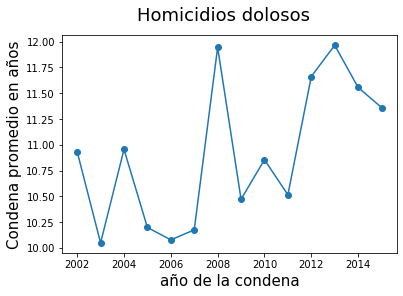

In [8]:
plt.plot(years, prom, '-o')
plt.suptitle('Homicidios dolosos', fontsize=18)
plt.xlabel('año de la condena', fontsize=15)
plt.ylabel('Condena promedio en años', fontsize=15)
plt.show()

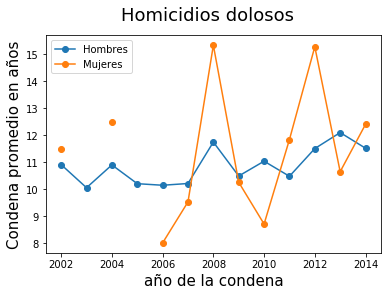

In [9]:
plt.plot(years[0:13], prom_m[0:13], '-o', label='Hombres')
plt.plot(years[0:13], prom_f[0:13], '-o', label='Mujeres')
plt.suptitle('Homicidios dolosos', fontsize=18)
plt.xlabel('año de la condena', fontsize=15)
plt.ylabel('Condena promedio en años', fontsize=15)
plt.legend()
plt.show()

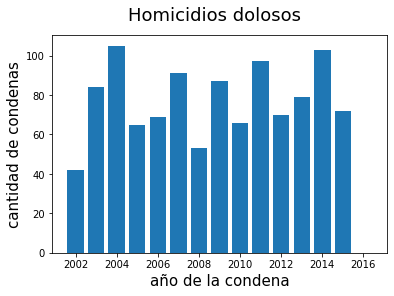

In [12]:
plt.bar(years, counts)
plt.suptitle('Homicidios dolosos', fontsize=18)
plt.xlabel('año de la condena', fontsize=15)
plt.ylabel('cantidad de condenas', fontsize=15)
plt.show()

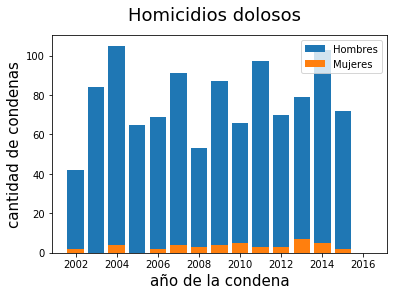

In [13]:
ax = plt.subplot(111)

plt.suptitle('Homicidios dolosos', fontsize=18)

ax.bar(years, counts, align='center', label='Hombres')
ax.bar(years, counts_f, align='center', label='Mujeres')

plt.xlabel('año de la condena', fontsize=15)
plt.ylabel('cantidad de condenas', fontsize=15)

plt.legend()
plt.show()

Promedio varones hasta año 2014:

In [10]:
sum(prom_m[0:13])/len(prom_m[0:13])

10.863088493409593

In [14]:
prom_f[0:13]

[11.5,
 nan,
 12.5,
 nan,
 8.0,
 9.520833333333334,
 15.333333333333334,
 10.25,
 8.7,
 11.833333333333334,
 15.277777777777777,
 10.642857142857142,
 12.4]

Promedio mujeres hasta año 2014:

In [15]:
prom_f[1]=0
prom_f[3]=0

In [16]:
sum(prom_f[0:13])/(len(prom_f[0:13])-2)

11.450739538239539

In [17]:
counts_f

[2, 0, 4, 0, 2, 4, 3, 4, 5, 3, 3, 7, 5, 2, 0]

In [18]:
counts_m

[40, 84, 101, 65, 67, 87, 50, 83, 61, 94, 67, 72, 98, 70, 0]

In [19]:
sum(counts_m)

1039

In [20]:
sum(counts_f)

44

In [21]:
prom_m

[10.904166666666665,
 10.047619047619047,
 10.893564356435641,
 10.197435897435897,
 10.139303482587064,
 10.204022988505747,
 11.741666666666667,
 10.481927710843374,
 11.031420765027322,
 10.472517730496454,
 11.499999999999998,
 12.09375,
 11.512755102040817,
 11.357142857142858,
 nan]

In [22]:
prom_f

[11.5,
 0,
 12.5,
 0,
 8.0,
 9.520833333333334,
 15.333333333333334,
 10.25,
 8.7,
 11.833333333333334,
 15.277777777777777,
 10.642857142857142,
 12.4,
 11.5,
 nan]